# Subspace Digital Twin, Sweep Credit Supply

* Shawn Anderson, December 2023*

In this notebook, we explore a test sweep over three credit supply definitions. These are: supply_issued, supply_earned, and supply_earned_minus_burned.

## Part 1. Exploratory Analysis

In [23]:
import pandas as pd
import hvplot.pandas
import plotly.io as pio
from holoviews import opts
import holoviews as hv
hvplot.extension('plotly')
pio.renderers.default = "png" # For GitHub rendering

Load simulation data and set index to `days_passed`, backfill (for initial timesteps) and replace nan with 0.

In [149]:
df = pd.read_pickle('../data/simulations/sweep_credit_supply-2023-12-21_21-28-41.pkl.gz').set_index('days_passed').bfill().fillna(0)

In [150]:
df

blocks_passed  circulating_supply   user_supply  issued_supply  \
days_passed                                                                   
0                      0.0        0.000000e+00  0.000000e+00   0.000000e+00   
1                  14400.0        1.369863e+01  1.369863e+01   1.680000e+09   
2                  28800.0        2.736301e+01  2.736301e+01   1.680000e+09   
3                  43200.0        4.930524e+01  4.930524e+01   1.680000e+09   
4                  57600.0        7.119261e+01  7.119261e+01   1.680000e+09   
...                    ...                 ...           ...            ...   
697             10036800.0        1.567352e+08  1.883771e+08   1.679535e+09   
698             10051200.0        1.566737e+08  1.884132e+08   1.679532e+09   
699             10065600.0        1.566125e+08  1.884496e+08   1.679529e+09   
700             10080000.0        1.565516e+08  1.884862e+08   1.679526e+09   
701             10094400.0        1.564911e+08  1.885231e+08   1.679523e+09   

             sum_of_stocks  block_utilization  dsf_relative_disbursal_per_day  \
days_passed                                                                     
0             0.000000e+00           0.000000                             0.0   
1             3.000000e+09           0.500000                             0.0   
2             3.000000e+09           0.500000                             0.0   
3             3.000000e+09           0.500000                             0.0   
4             3.000000e+09           0.500000                             0.0   
...                    ...                ...                             ...   
697           3.000000e+09           0.954795                             0.0   
698           3.000000e+09           0.956164                             0.0   
699           3.000000e+09           0.957534                             0.0   
700           3.000000e+09           0.958904                             0.0   
701           3.000000e+09           0.960274                             0.0   

             reward_issuance_balance  other_issuance_balance  \
days_passed                                                    
0                       1.320000e+09            1.680000e+09   
1                       1.320000e+09            1.680000e+09   
2                       1.320000e+09            1.680000e+09   
3                       1.320000e+09            1.680000e+09   
4                       1.320000e+09            1.680000e+09   
...                              ...                     ...   
697                     1.319985e+09            1.188945e+09   
698                     1.319985e+09            1.188144e+09   
699                     1.319985e+09            1.187342e+09   
700                     1.319985e+09            1.186541e+09   
701                     1.319985e+09            1.185740e+09   

             operators_balance  ...  subset  run  timestep  delta_days  \
days_passed                     ...                                      
0                 0.000000e+00  ...       0    1         0         1.0   
1                 0.000000e+00  ...       0    1         1         1.0   
2                 0.000000e+00  ...       0    1         2         1.0   
3                 0.000000e+00  ...       0    1         3         1.0   
4                 2.771161e-03  ...       0    1         4         1.0   
...                        ...  ...     ...  ...       ...         ...   
697               1.424484e+06  ...       5    6       697         1.0   
698               1.423971e+06  ...       5    6       698         1.0   
699               1.423461e+06  ...       5    6       699         1.0   
700               1.422954e+06  ...       5    6       700         1.0   
701               1.422449e+06  ...       5    6       701         1.0   

             delta_blocks  average_compute_weight_per_budle  \
days_passed                                                   
0        

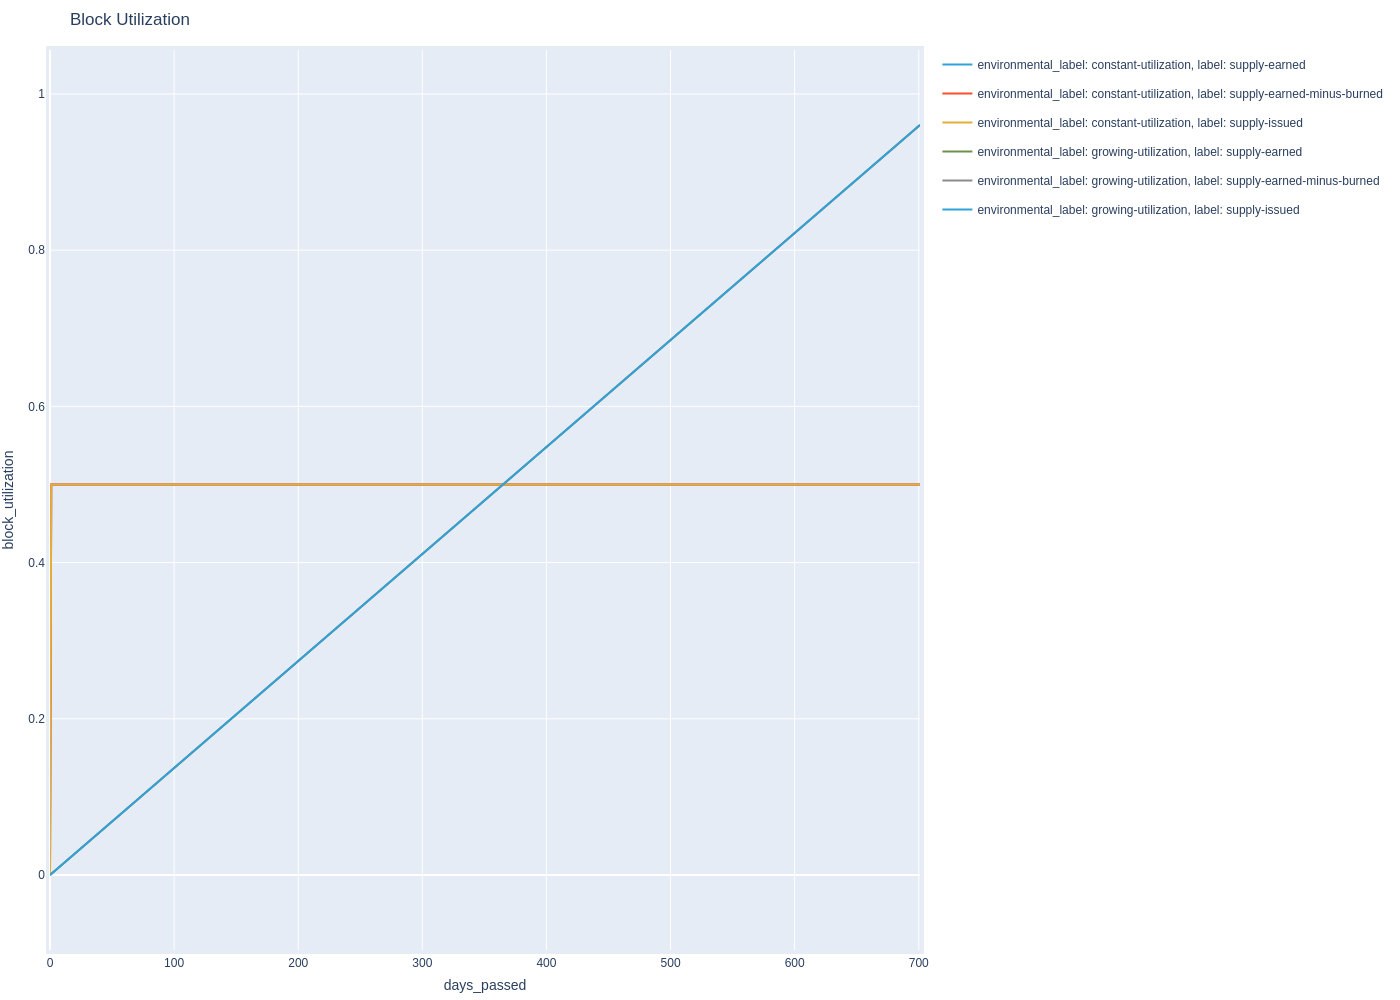

In [169]:
chart = df.hvplot.line(x='days_passed', y='block_utilization', by=['environmental_label','label'], title='Block Utilization', height=1000, width=1400)
pio.show(hv.render(chart, backend='plotly'))

Create a normalized version of the simulation data for exploring the results. This will allow us to see all stocks in the range of 0-1.

In [170]:
# Take numeric columns for normalizationn
df_numeric = df.select_dtypes(include=['number'])

# Create the normalized results
df_normalized = df_numeric / df_numeric.max()

# Add the label column back
df_normalized[['label', 'environmental_label']] = df[['label', 'environmental_label']]

# Drop unecessary columns
df_normalized = df_normalized.drop(['run', 'timestep', 'simulation', 'subset', 'timestep_in_days', 'block_time_in_seconds', 'sum_of_stocks'], axis=1)

df_normalized

blocks_passed  circulating_supply   user_supply  issued_supply  \
days_passed                                                                   
0                 0.000000        0.000000e+00  0.000000e+00       0.000000   
1                 0.001427        6.088169e-08  6.088155e-08       0.999995   
2                 0.002853        1.216112e-07  1.216109e-07       0.999995   
3                 0.004280        2.191304e-07  2.191299e-07       0.999995   
4                 0.005706        3.164058e-07  3.164051e-07       0.999995   
...                    ...                 ...           ...            ...   
697               0.994294        6.965881e-01  8.372146e-01       0.999718   
698               0.995720        6.963148e-01  8.373750e-01       0.999716   
699               0.997147        6.960429e-01  8.375366e-01       0.999714   
700               0.998573        6.957723e-01  8.376994e-01       0.999713   
701               1.000000        6.955031e-01  8.378633e-01       0.999711   

             block_utilization  dsf_relative_disbursal_per_day  \
days_passed                                                      
0                     0.000000                             NaN   
1                     0.520685                             NaN   
2                     0.520685                             NaN   
3                     0.520685                             NaN   
4                     0.520685                             NaN   
...                        ...                             ...   
697                   0.994294                             NaN   
698                   0.995720                             NaN   
699                   0.997147                             NaN   
700                   0.998573                             NaN   
701                   1.000000                             NaN   

             reward_issuance_balance  other_issuance_balance  \
days_passed                                                    
0                           1.000000                1.000000   
1                           1.000000                1.000000   
2                           1.000000                1.000000   
3                           1.000000                1.000000   
4                           1.000000                1.000000   
...                              ...                     ...   
697                         0.999988                0.707705   
698                         0.999988                0.707228   
699                         0.999988                0.706751   
700                         0.999988                0.706274   
701                         0.999988                0.705797   

             operators_balance  nominators_balance  ...  average_bundle_size  \
days_passed                                         ...                        
0                 0.000000e+00        0.000000e+00  ...                  NaN   
1                 0.000000e+00        0.000000e+00  ...                  NaN   
2                 0.000000e+00        0.000000e+00  ...                  NaN   
3                 0.000000e+00        0.000000e+00  ...                  NaN   
4                 7.438421e-10        3.149089e-10  ...                  NaN   
...                        ...                 ...  ...                  ...   
697               3.823637e-01        9.829951e-01  ...                  NaN   
698               3.822261e-01        9.827385e-01  ...                  NaN   
699               3.820892e-01        9.824813e-01  ...                  NaN   
700               3.819530e-01        9.822235e-01  ...                  NaN   
701               3.818175e-01        9.819651e-01  ...                  NaN   

             bundle_count  compute_fee_volume  storage_fee_volume  \
days_passed                                                         
0                     0.0            0.000000        0.000000e+00   
1                     1.0            0.000000

Isolate columns that differ over the parameter sets.

In [107]:
# Group by 'days_past` to see if there is variation across labels per day
differing_values = df_normalized.groupby('days_passed').nunique()

# Take columns that have any day where values are varied across labels.
df_differing_columns = df_normalized[list(differing_values.columns[differing_values.gt(1).any()])]
df_differing_columns.shape

(4212, 17)

This gets us down to 16 columns from 38 whoo!

Group by label. Each label represents a parameter set for AB testing.

In [108]:
df_differing_columns

circulating_supply   user_supply  issued_supply  \
days_passed                                                    
0                  0.000000e+00  0.000000e+00       0.000000   
1                  5.821213e-08  2.799656e-08       0.999994   
2                  1.162787e-07  5.592313e-08       0.999994   
3                  2.323440e-07  1.117437e-07       0.999994   
4                  3.480195e-07  1.673772e-07       0.999994   
...                         ...           ...            ...   
697                7.023821e-01  9.936989e-01       0.997113   
698                7.018365e-01  9.952744e-01       0.997095   
699                7.012946e-01  9.968498e-01       0.997076   
700                7.007563e-01  9.984250e-01       0.997058   
701                7.002217e-01  1.000000e+00       0.997040   

             reward_issuance_balance  operators_balance  nominators_balance  \
days_passed                                                                   
0                           1.000000       0.000000e+00        0.000000e+00   
1                           1.000000       0.000000e+00        0.000000e+00   
2                           1.000000       1.325975e-10        3.597181e-11   
3                           1.000000       4.512372e-10        1.241948e-10   
4                           1.000000       1.105456e-09        3.077169e-10   
...                              ...                ...                 ...   
697                         0.999988       4.802630e-01        8.480873e-01   
698                         0.999988       4.799338e-01        8.472693e-01   
699                         0.999988       4.796079e-01        8.464550e-01   
700                         0.999988       4.792853e-01        8.456446e-01   
701                         0.999988       4.789660e-01        8.448379e-01   

             holders_balance  farmers_balance  staking_pool_balance  \
days_passed                                                           
0               0.000000e+00         0.000000          0.000000e+00   
1               3.106239e-09         0.004657          0.000000e+00   
2               7.649025e-09         0.009185          0.000000e+00   
3               1.595397e-08         0.018297          2.110478e-13   
4               2.598641e-08         0.027233          9.344585e-13   
...                      ...              ...                   ...   
697             3.271904e-01         0.245543          9.889328e-01   
698             3.269998e-01         0.245550          9.917040e-01   
699             3.268112e-01         0.245557          9.944723e-01   
700             3.266244e-01         0.245564          9.972376e-01   
701             3.264396e-01         0.245571          1.000000e+00   

             fund_balance  burnt_balance  nominator_pool_shares  \
days_passed                                                       
0                0.000000   0.000000e+00           0.000000e+00   
1                0.000000   0.000000e+00           0.000000e+00   
2                0.000007   0.000000e+00           0.000000e+00   
3                0.000025   0.000000e+00           1.256588e-13   
4                0.000062   1.306917e-15           5.595036e-13   
...                   ...            ...                    ...   
697              0.065656   9.754012e-01           9.881667e-01   
698              0.065861   9.815251e-01           9.911293e-01   
699              0.066067   9.876663e-01           9.940891e-01   
700              0.066272   9.938246e-01           9.970459e-01   
701              0.066478   1.000000e+00           1.000000e+00   

             operator_pool_shares  block_reward  storage_fee_volume  \
days_passed                                                           
0                    0.000000e+00      0.500001            0.000000   
1                    0.000000e+00      0.500001            0.000000   
2                    0.000000e+00      0.500001            0.002417   
3

In [115]:
labels = list(df_differing_columns['label'].unique())
environmental_labels = list(df_differing_columns['environmental_label'].unique())

In [116]:
labels

['supply-issued', 'supply-earned', 'supply-earned-minus-burned']

In [117]:
environmental_labels

['constant-utilization', 'growing-utilization']

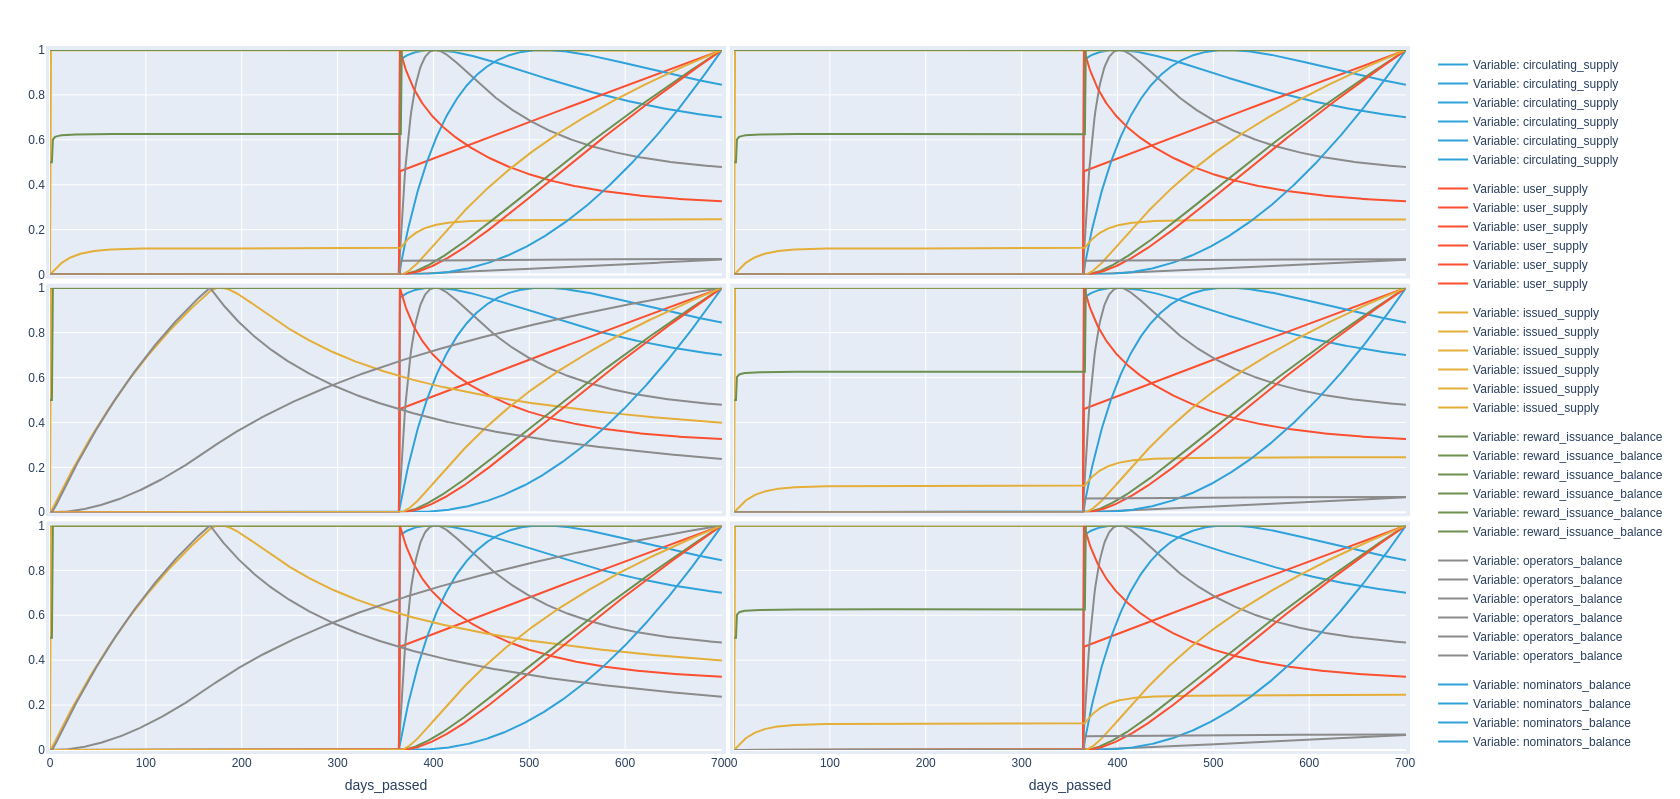

In [118]:
chart = df_differing_columns.hvplot(row='label', col='environmental_label', height=1000, width=1400, ylim=(0,1))
pio.show(hv.render(chart, backend='plotly'))

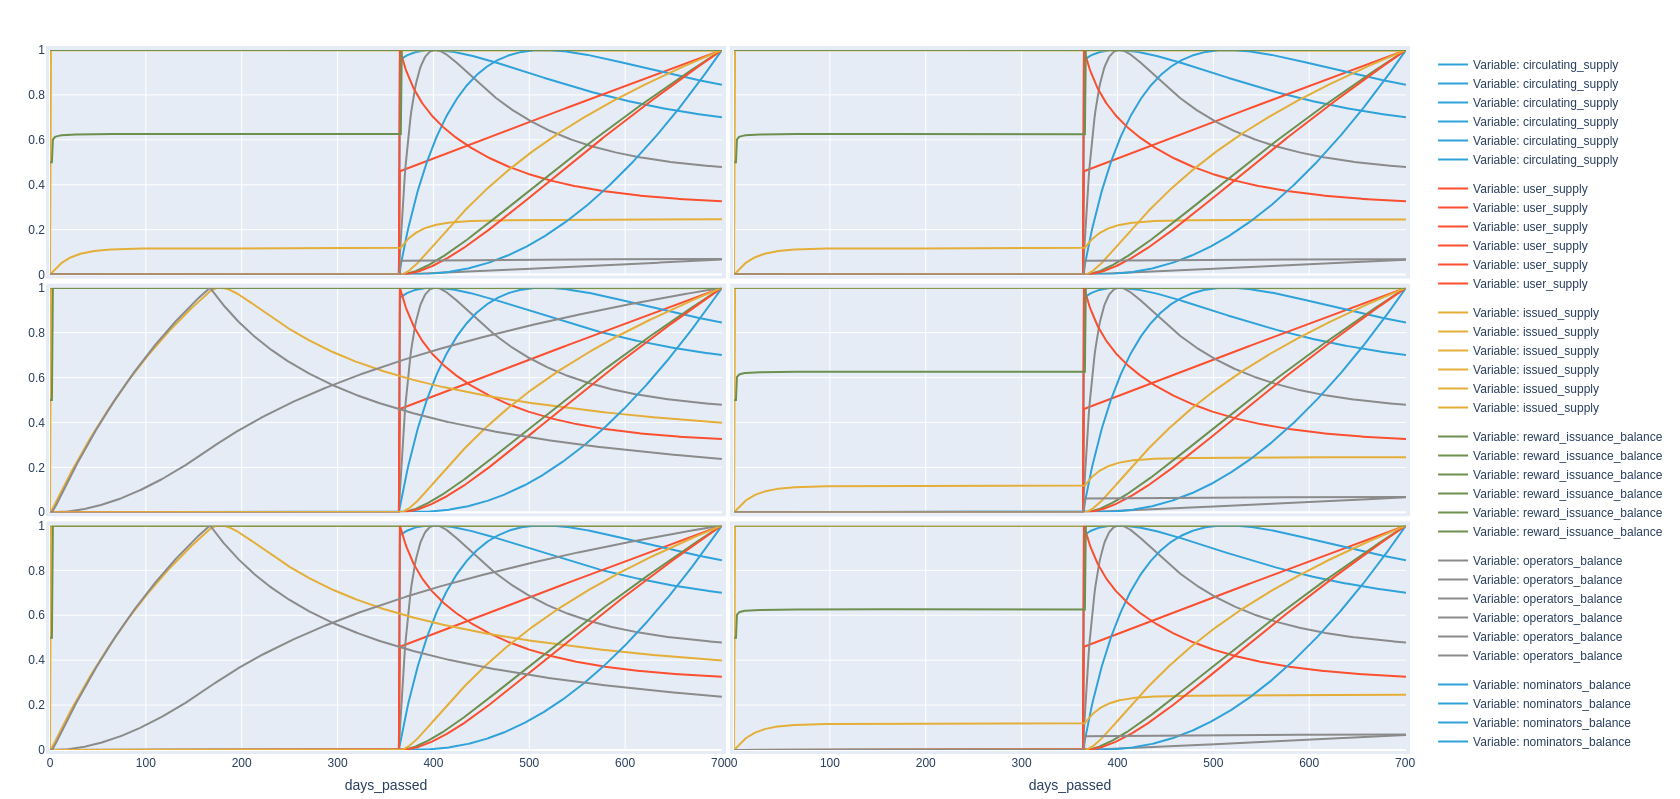

In [95]:
chart = df_differing_columns.hvplot(row='label', col='environmental_label', height=1000, width=1400, ylim=(0,1))
pio.show(hv.render(chart, backend='plotly'))

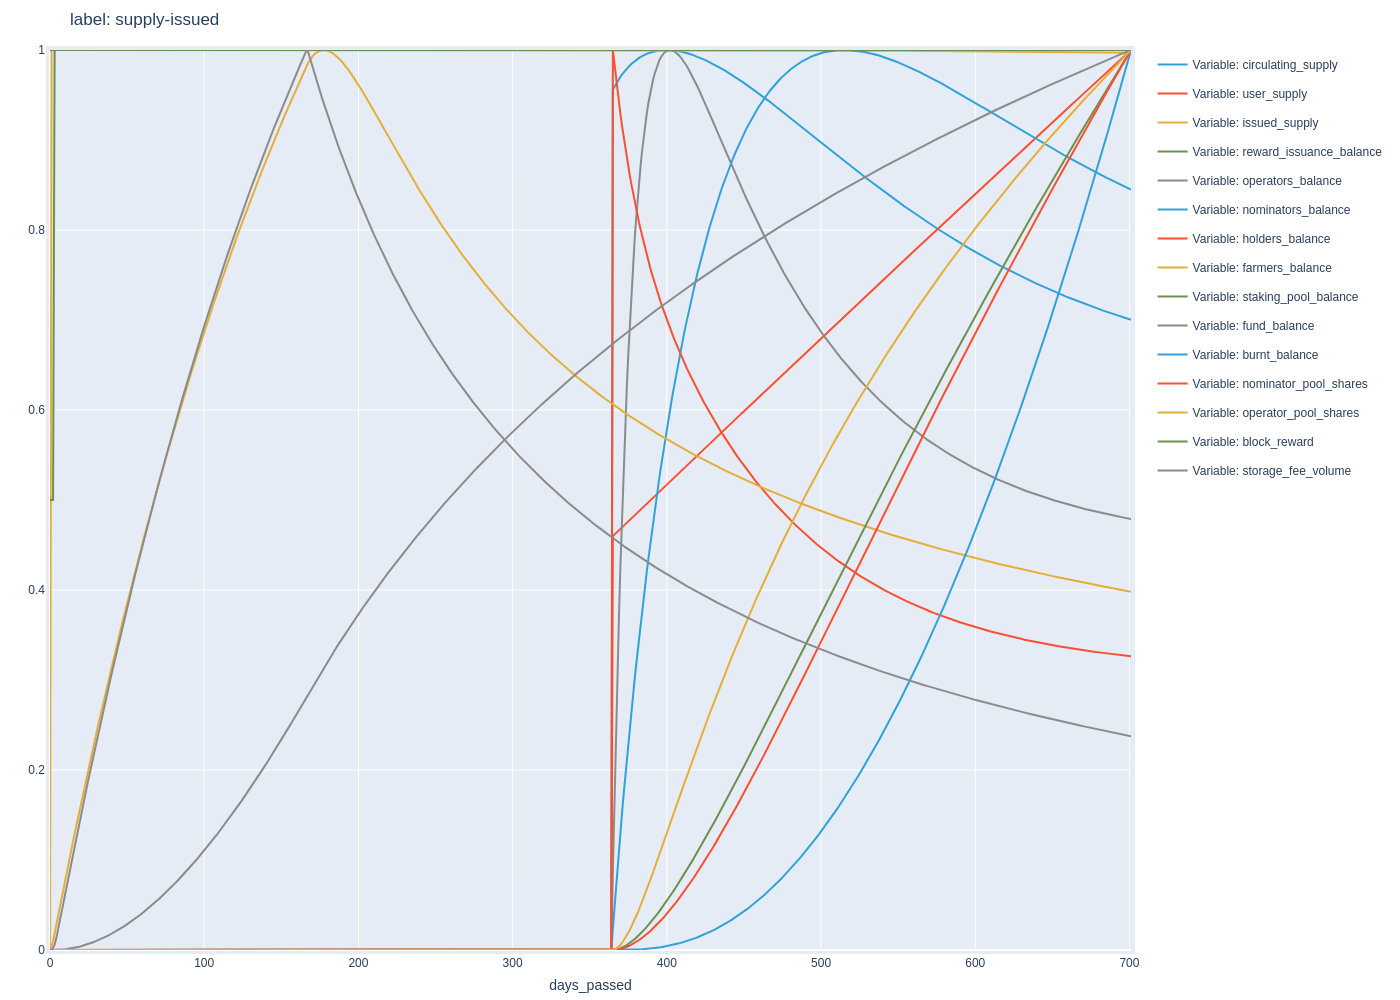

In [48]:
chart = df_differing_columns.hvplot(groupby='label', height=1000, width=1400, ylim=(0,1), grid=False)
pio.show(hv.render(chart, backend='plotly'))

Create a long form dataframe.

In [10]:
long_df = df_differing_columns.reset_index().melt(id_vars=['days_passed', 'label'], var_name='State', value_name='Value')
long_df

days_passed                       label               State     Value
0                0               supply-issued  circulating_supply  0.002797
1                1               supply-issued  circulating_supply  0.002797
2                2               supply-issued  circulating_supply  0.005591
3                3               supply-issued  circulating_supply  0.008386
4                4               supply-issued  circulating_supply  0.011182
...            ...                         ...                 ...       ...
31585          697  supply-earned-minus-burned  storage_fee_volume  0.002473
31586          698  supply-earned-minus-burned  storage_fee_volume  0.002473
31587          699  supply-earned-minus-burned  storage_fee_volume  0.002473
31588          700  supply-earned-minus-burned  storage_fee_volume  0.002473
31589          701  supply-earned-minus-burned  storage_fee_volume  0.002473

[31590 rows x 4 columns]

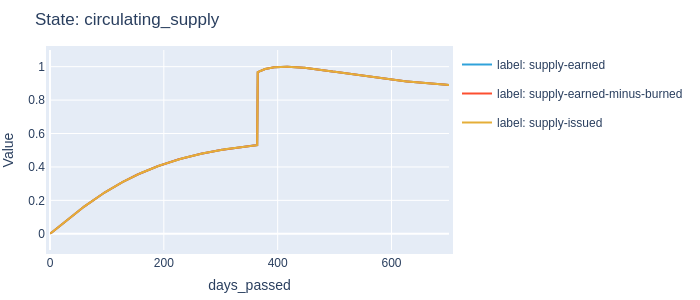

In [11]:
chart = long_df.hvplot.line(
    x='days_passed', 
    y='Value', 
    by='label', 
    groupby='State',
)
pio.show(hv.render(chart, backend='plotly'))

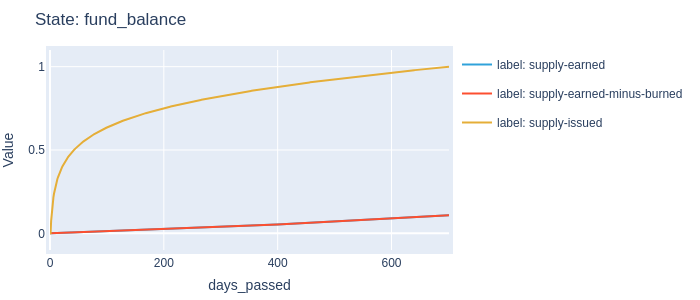

In [12]:
chart = long_df[long_df['State'].isin(['fund_balance', 'storage_fee_volume', 'block_reward'])].hvplot(x='days_passed', y='Value', groupby='State', by='label')
pio.show(hv.render(chart, backend='plotly'))

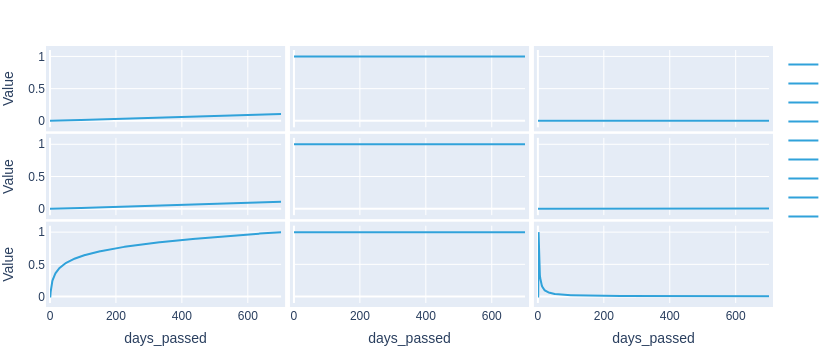

In [13]:
chart = long_df[long_df['State'].isin(['fund_balance', 'storage_fee_volume', 'block_reward'])].hvplot(x='days_passed', y='Value', row='State', col='label', subplots=True, shared_axes=False, xaxis=False)
pio.show(hv.render(chart, backend='plotly'))

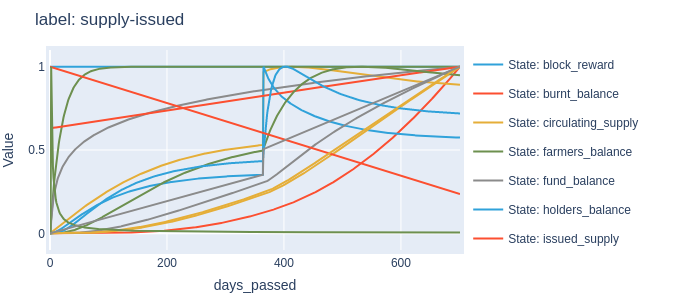

In [14]:
chart = long_df.hvplot.line(x='days_passed', y='Value', by='State', groupby='label')
pio.show(hv.render(chart, backend='plotly'))

In [15]:
# chart = long_df.hvplot.line(x='days_passed', y='Value', row='State', by='label', shared_axes=False)
# pio.show(hv.render(chart, backend='plotly'))

In [16]:
y = ['circulating_supply', 'user_supply', 'issued_supply', 'staking_pool_balance', 'fund_balance', 'burnt_balance', 'reward_issuance_balance', 'farmers_balance', 'holders_balance', 'storage_fee_volume', 'space_pledged', 'history_size', 'replication_factor']

In [17]:
long_df[long_df['State'].isin(y)]

days_passed                       label               State     Value
0                0               supply-issued  circulating_supply  0.002797
1                1               supply-issued  circulating_supply  0.002797
2                2               supply-issued  circulating_supply  0.005591
3                3               supply-issued  circulating_supply  0.008386
4                4               supply-issued  circulating_supply  0.011182
...            ...                         ...                 ...       ...
31585          697  supply-earned-minus-burned  storage_fee_volume  0.002473
31586          698  supply-earned-minus-burned  storage_fee_volume  0.002473
31587          699  supply-earned-minus-burned  storage_fee_volume  0.002473
31588          700  supply-earned-minus-burned  storage_fee_volume  0.002473
31589          701  supply-earned-minus-burned  storage_fee_volume  0.002473

[21060 rows x 4 columns]

:GridSpace   [State,label]
   :Curve   [days_passed]   (Value)
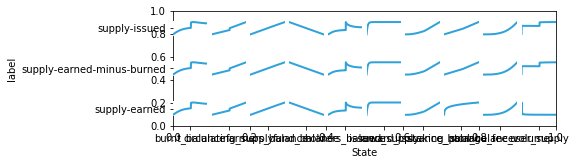

In [18]:
hvplot.extension('matplotlib')
chart = long_df[long_df['State'].isin(y)].hvplot(x='days_passed', y='Value', row='State', col='label', subplots=True, shared_axes=False, xaxis=False, yaxis=False)
chart

In [19]:
hvplot.extension('bokeh')
def plot_column(df: pd.DataFrame, column: str):
    df = df.reset_index().groupby(['label', 'days_passed']).mean().reset_index()
    chart = df.hvplot.line(y=column, by='label', x='days_passed', alpha=0.8, line_width=4, height=200, width=1200)
    return chart

In [20]:
charts_dict = {column: plot_column(df_differing_columns, column) for column in df_differing_columns.columns}

In [21]:
holomap = hv.HoloMap(charts_dict)
grid = hv.GridSpace(holomap)
layout = hv.NdLayout(grid)
layout = layout.cols(1)
layout

:NdLayout   [Default]
   :NdOverlay   [label]
      :Curve   [days_passed]   (user_supply)

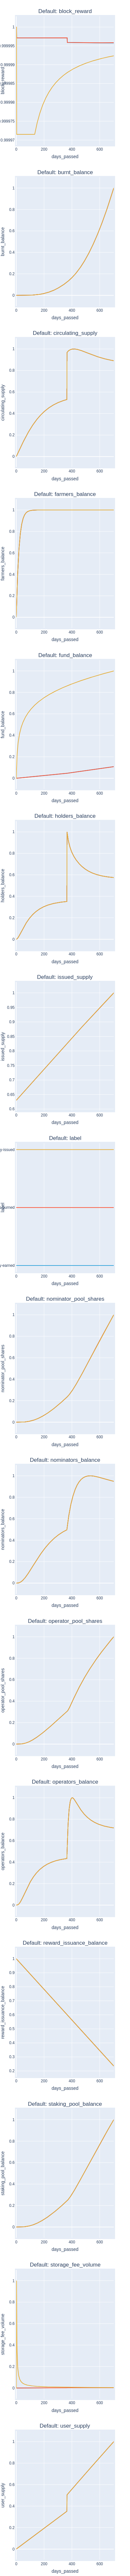

In [22]:
pio.show(hv.render(layout, backend='plotly'))